In [1]:
from matplotlib import pyplot as plt

In [2]:
statistics_filename = "statistic.txt"
sizes = {}
compressions = []
important_compressions = []
important_words_compressions = []
with open(statistics_filename) as handler:
    for line in handler:
        word, posting_size, encoded_size = line.strip().split()
        posting_size, encoded_size = int(posting_size), int(encoded_size)
        sizes[word] = posting_size, encoded_size
        compresion = posting_size * 4 / encoded_size
        compressions.append(compresion)
        if posting_size > 100:
            important_compressions.append(compresion)
            important_words_compressions.append((compresion, word))

Распределение сжатий


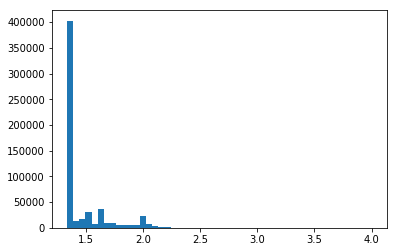

In [3]:
plt.hist(compressions, bins=50)
print("Распределение сжатий")
plt.show()

Распределение сжатий для длинных постинг личтов


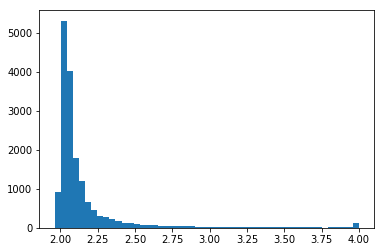

In [4]:
plt.hist(important_compressions, bins=50)
print("Распределение сжатий для длинных постинг личтов")
plt.show()

Хм. Логирифм!

Распределение сжатий


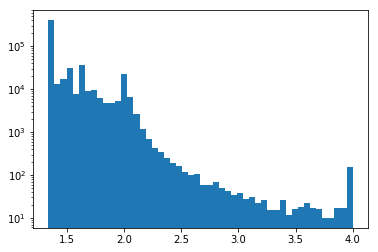

In [5]:
plt.hist(compressions, bins=50, log=True)
print("Распределение сжатий")
plt.show()

Распределение сжатий для длинных постинг личтов


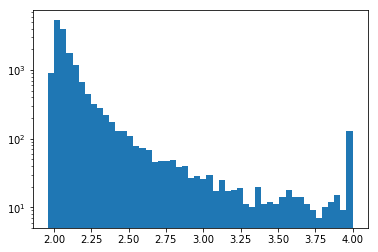

In [6]:
plt.hist(important_compressions, bins=50, log=True)
print("Распределение сжатий для длинных постинг личтов")
plt.show()

Выглядит нормально (не в смысле Гаусса, конечно)

In [7]:
print("Хорошо сжимаемые слова:")
sorted(important_words_compressions, key=lambda pair: -pair[0])[:10]

Хорошо сжимаемые слова:


[(4.0, 'encyclopedia'),
 (4.0, 'the'),
 (4.0, 'free'),
 (4.0, 'article'),
 (4.0, 'to'),
 (4.0, 'help'),
 (4.0, 'license'),
 (4.0, 'from'),
 (4.0, 'be'),
 (4.0, 'short')]

In [8]:
print("Плохо сжимаемые слова")
sorted(important_words_compressions, key=lambda pair: pair[0])[:10]

Плохо сжимаемые слова


[(1.9619047619047618, 'crusaders'),
 (1.9626168224299065, 'hatfield'),
 (1.9626168224299065, 'veracruz'),
 (1.962962962962963, 'labors'),
 (1.962962962962963, 'herakles'),
 (1.962962962962963, 'holders'),
 (1.9636363636363636, 'bricks'),
 (1.967741935483871, 'gamesgame'),
 (1.968503937007874, 'schatz'),
 (1.9710144927536233, 'suppressor')]

Как видно, постинг листы слов, которые часто встречаются сжимаются хорошо. Это происходит потому, что они встречаются в большм числе документов и оченеь редко случается так, что какой-то документ не содержит слово. Поэтому редко документ не присутствует в постинг листе и все дельты становятся мельнькими. А такое varint хорошо сжимает.